# Data Analaysis of Spotify Tracks
#### Julia Lau

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## 1. Data Exploration

In [209]:
df = pd.read_csv("data/spotify_tracks.csv")
df.shape

(114000, 21)

In [210]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Columns that look useful: 
* artists, track_name, popularity, duration_ms, explicit, danceability, energy, key, mode, valence, tempo, time_signature, and track_genre

From this info, I could learn:
* the popularity of certain genres
* artists that have popular songs
* which genres are best for dancing
* which keys or modes are most popular

In [212]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


According to my exploration of the data, this dataset is worth exploring furthere because it contains useful columns that could help me draw interesting conclusions. Furthermore, lower than 10% of values are null (little to none). There are no duplicates in this dataset.

## 2. Data Cleaning

#### 2a. Dropping Columns

First, I will drop the columns that are not necessary to answering my findings, as listed above. 

In [213]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [214]:
df = df[['artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'mode', 'valence', 'tempo', 'time_signature',
       'track_genre']]

In [215]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,mode,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,0,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,1,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,1,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,1,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,1,0.167,119.949,4,acoustic


#### 2b. Renaming Columns

In [216]:
# Renaming columns
df = df.rename(columns={'artists':'Artist',
                   'album_name':'Album_Name',
                   'track_name': 'Track_Name',
                   'popularity':'Popularity_percent',
                   'duration_ms':'Duration_sec',
                   'explicit':'Explicit',
                   'danceability':'Danceability_index',
                   'energy':'Energy_index',
                   'key':'Musical_Key',
                   'mode':'Mode',
                   'valence':'Valence_index',
                   'tempo':'Tempo_bpm',
                   'time_signature':'Time_Signature',
                   'track_genre':'Track_Genre'})

In [217]:
df.head()

,Artist,Album_Name,Track_Name,Popularity_percent,Duration_sec,Explicit,Danceability_index,Energy_index,Musical_Key,Mode,Valence_index,Tempo_bpm,Time_Signature,Track_Genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,0,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,1,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,1,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,1,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,1,0.167,119.949,4,acoustic


#### 2c. Checking for Duplicates

In [218]:
df.duplicated(subset=["Track_Name", "Duration_sec"]).sum()

31006

In [219]:
df.loc[df.duplicated(subset=["Track_Name", "Duration_sec"], keep=False)].sort_values("Track_Name")

,Artist,Album_Name,Track_Name,Popularity_percent,Duration_sec,Explicit,Danceability_index,Energy_index,Musical_Key,Mode,Valence_index,Tempo_bpm,Time_Signature,Track_Genre
93440,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.332,1,1,0.0527,62.970,4,romance
93397,Nikolay Kopylov,Popular Opera Arias,"""Don Carlos"" Roderigo'S Death Aria",0,235547,False,0.167,0.332,1,1,0.0527,62.970,4,romance
16385,Felix Mendelssohn;Christopher Herrick;Simon Pr...,Klassische Weihnachtsmusik,"""Hark! The Herald Angels Sing""",0,141000,False,0.158,0.210,7,1,0.1930,80.984,4,classical
39446,Felix Mendelssohn;Christopher Herrick;Simon Pr...,Klassische Weihnachtsmusik,"""Hark! The Herald Angels Sing""",0,141000,False,0.158,0.210,7,1,0.1930,80.984,4,german
111315,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880,False,0.754,0.719,10,0,0.6740,175.990,4,trip-hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69940,Namewee;Leehom Wang,亞洲通車,飄向北方,55,269181,False,0.500,0.778,0,0,0.2790,173.906,4,malay
12313,Eason Chan,我的快樂時代 (華星40系列),黃金時代,46,248040,False,0.555,0.494,4,1,0.2800,144.044,4,cantopop
70665,Eason Chan,我的快樂時代 (華星40系列),黃金時代,46,248040,False,0.555,0.494,4,1,0.2800,144.044,4,mandopop
99504,Eddy Kim,당신이 잠든 사이에 Pt. 1 Original Television Soundtrack,긴 밤이 오면,56,226991,False,0.480,0.501,5,1,0.2220,110.889,4,singer-songwriter


Because there are many duplicates of the same Track_Name (with same duration), I will drop the duplicates.

In [220]:
df = df.drop_duplicates(subset=["Track_Name", "Duration_sec"])

In [221]:
df.shape

(82994, 14)

#### 2d. Re-Formatting Columns

In [222]:
# Change miliseconds to seconds
df["Duration_sec"] = df["Duration_sec"].map(lambda dur: dur/1000)

Here I changed the units of duration column from miliseconds to seconds because it is easier to interpret and understand the data points better.

In [223]:
df.head()

,Artist,Album_Name,Track_Name,Popularity_percent,Duration_sec,Explicit,Danceability_index,Energy_index,Musical_Key,Mode,Valence_index,Tempo_bpm,Time_Signature,Track_Genre
0,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,0,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,1,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,1,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,1,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,1,0.167,119.949,4,acoustic


Here, I will change the musical keys, originally number values that correspond to musical keys, to the Alphabetical key they correspond to. This change will make it easier to interpret our data.

In [224]:
keys = {0:"C", 1:"C#", 2:"D", 3:"D#", 4:"E", 5:"F", 6:"F#", 7:"G", 8:"G#", 9:"A", 10:"Bf", 11:"B"}
df["Musical_Key"] = df["Musical_Key"].map(lambda x: keys[x])

In [225]:
df.head()

,Artist,Album_Name,Track_Name,Popularity_percent,Duration_sec,Explicit,Danceability_index,Energy_index,Musical_Key,Mode,Valence_index,Tempo_bpm,Time_Signature,Track_Genre
0,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,C#,0,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,C#,1,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,C,1,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,C,1,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,D,1,0.167,119.949,4,acoustic


## 3. Exploratory Data Analaysis

#### 3a. Univariate Analysis

Context: This data contains information of Spotify tracks including its artist, album, popularity, and charactaraistics.

Shape: Tempo

<Axes: xlabel='Tempo_bpm'>

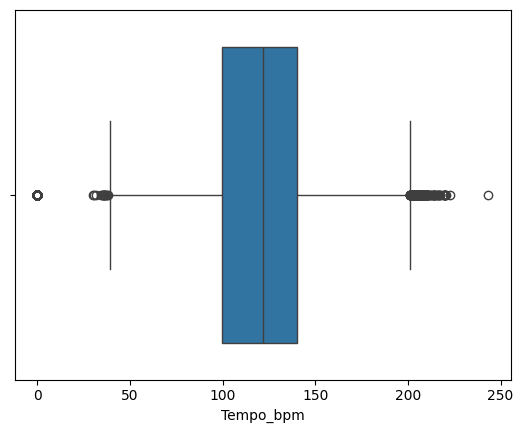

In [226]:
sns.boxplot(data=df,x="Tempo_bpm")

Shape: Duration

<Axes: xlabel='Duration_sec'>

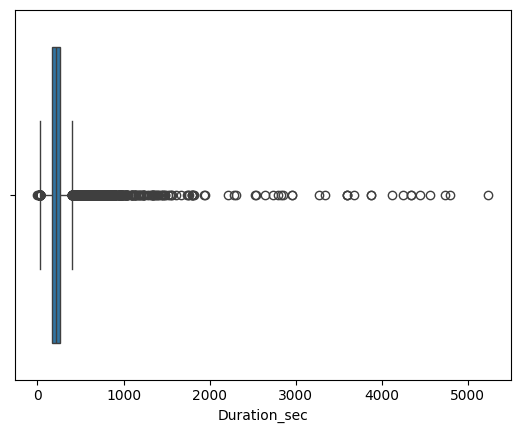

In [227]:
sns.boxplot(data=df, x="Duration_sec")

Outliers: According to the boxplots above, there seems to be outliers both above and below the median duration and tempo of songs. 

Center:

In [228]:
numeric = df.select_dtypes("number")
numeric.mean()

Popularity_percent     34.726318
Duration_sec          231.267835
Danceability_index      0.559441
Energy_index            0.634899
Mode                    0.633733
Valence_index           0.465020
Tempo_bpm             122.157015
Time_Signature          3.897511
dtype: float64

Spread:

In [229]:
numeric.max() - numeric.min()

Popularity_percent     100.000
Duration_sec          5237.295
Danceability_index       0.985
Energy_index             1.000
Mode                     1.000
Valence_index            0.995
Tempo_bpm              243.372
Time_Signature           5.000
dtype: float64

#### 3b. Multivariate Analaysis

Text(0.5, 1.0, 'Popularity v. Duration of Tracks')

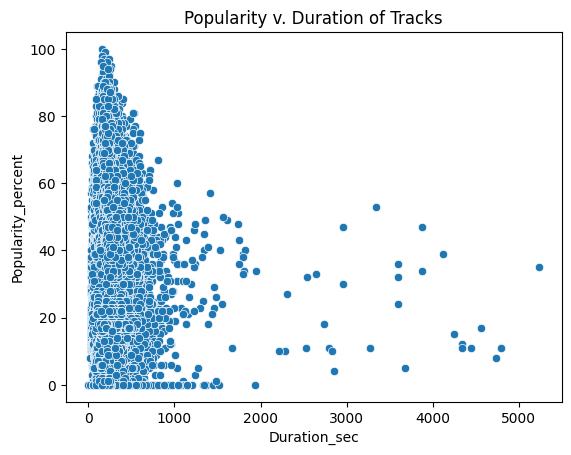

In [230]:
sns.scatterplot(data=df, x="Duration_sec", y="Popularity_percent")
plt.title("Popularity v. Duration of Tracks")

## 4. Statistical Analysis

### Question 1: What are the top three most popular genres of music?

In [231]:
# Sort values by popularity
df = df.sort_values('Popularity_percent', ascending=False)
df.head()

,Artist,Album_Name,Track_Name,Popularity_percent,Duration_sec,Explicit,Danceability_index,Energy_index,Musical_Key,Mode,Valence_index,Tempo_bpm,Time_Signature,Track_Genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156.943,False,0.714,0.472,D,1,0.238,131.121,4,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198.937,False,0.621,0.782,D,1,0.550,128.033,4,hip-hop
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175.238,True,0.561,0.965,G,0,0.304,128.040,4,dance
67356,Manuel Turizo,La Bachata,La Bachata,98,162.637,False,0.835,0.679,G,0,0.850,124.980,4,latin
67359,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243.716,False,0.650,0.715,F,0,0.187,106.672,4,latin


In [274]:
df.groupby("Track_Genre")[["Popularity_percent"]].median().sort_values("Popularity_percent", ascending=False)

,Popularity_percent
Track_Genre,
pop,67.0
electro,63.0
metal,63.0
hip-hop,61.0
k-pop,61.0
...,...
country,1.0
iranian,0.0
jazz,0.0


In [275]:
df.groupby("Track_Genre")[["Popularity_percent"]].mean().sort_values("Popularity_percent", ascending=False)

,Popularity_percent
Track_Genre,
k-pop,59.399538
pop-film,59.164808
metal,57.153153
pop,55.645695
chill,55.109290
...,...
grindcore,14.520325
chicago-house,12.308718
detroit-techno,11.122210


<Axes: xlabel='Track_Genre', ylabel='Popularity_percent'>

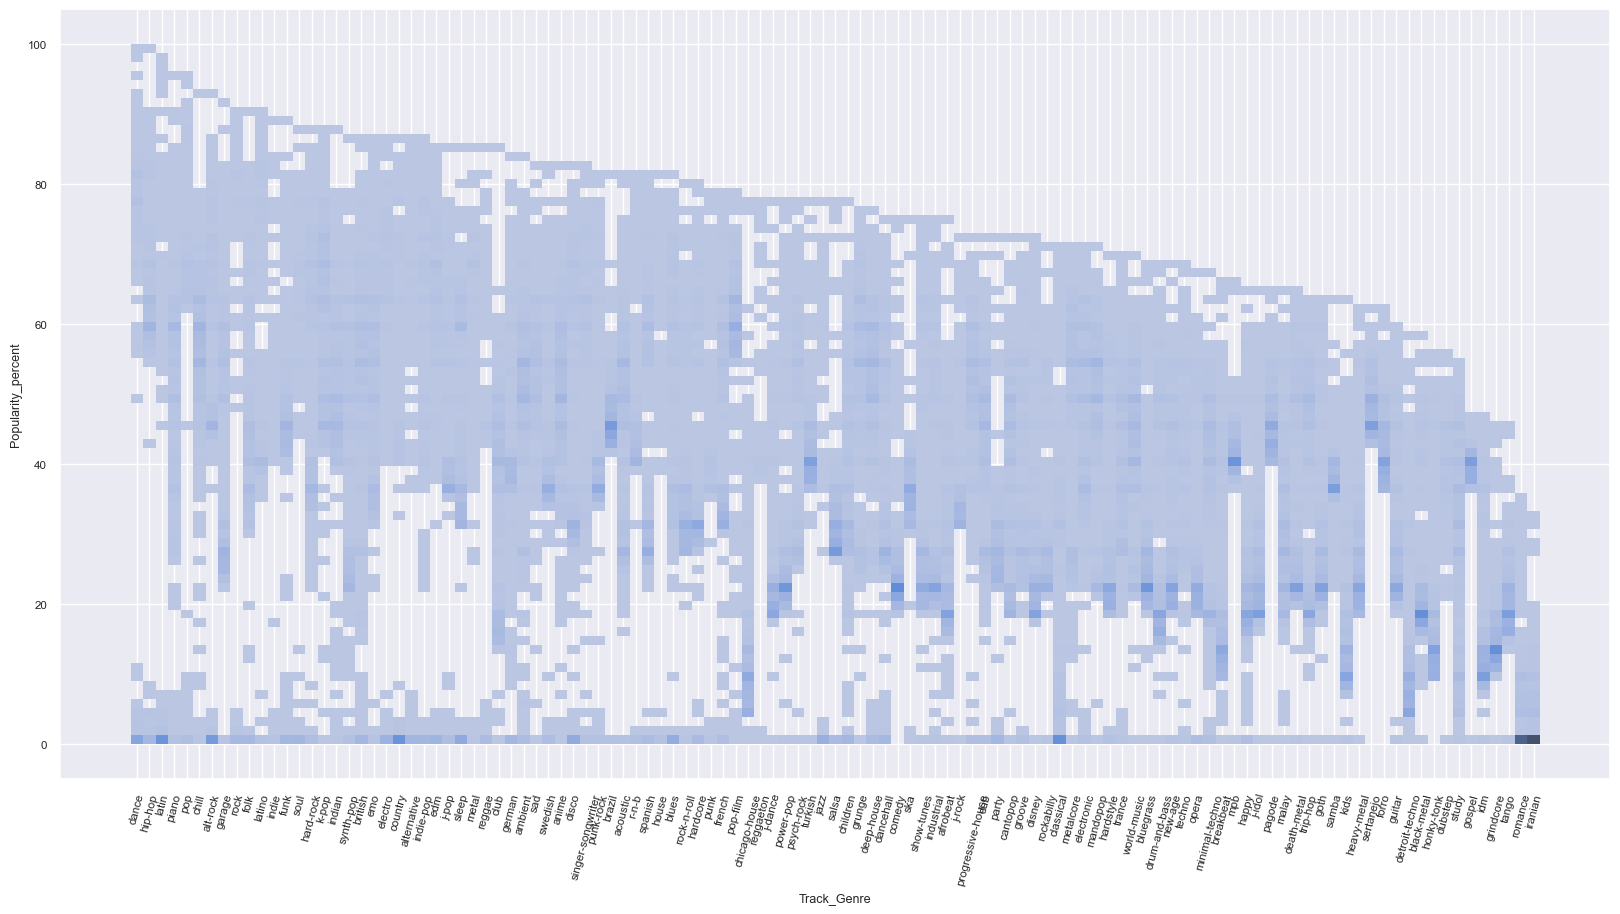

In [273]:
plt.figure(figsize=(20,10))
sns.set(font_scale=0.75)
plt.xticks(rotation=75)

sns.histplot(data=df, x="Track_Genre", y="Popularity_percent")

Conclusion: From our analysis above of the mean, median, and histogram distributions, we can see that Pop had the highest popularity on average (which included K-Pop and Pop-film popularities), followed by Hip Hop and Metal genres.

### Question 2: Which genre of music has the best danceability?

In [241]:
df.groupby("Track_Genre")[["Danceability_index"]].mean().sort_values("Danceability_index", ascending=False)

,Danceability_index
Track_Genre,
kids,0.780696
chicago-house,0.766262
latino,0.756105
reggaeton,0.746239
minimal-techno,0.732690
...,...
opera,0.306656
iranian,0.299948
black-metal,0.296161


In [278]:
df.groupby("Track_Genre")[["Danceability_index"]].median().sort_values("Danceability_index", ascending=False)

,Danceability_index
Track_Genre,
kids,0.7955
chicago-house,0.7790
latino,0.7630
minimal-techno,0.7470
detroit-techno,0.7470
...,...
opera,0.2840
black-metal,0.2815
iranian,0.2800


Conclusion: From our analysis above of the mean and median, we can see that Kids music, followed by Chicago-house and Latino genres have the greatest danceability index.

### Question 3: What are the average BPM for each genre?

In [288]:
df.groupby("Track_Genre")[["Tempo_bpm"]].mean().sort_values("Tempo_bpm", ascending=False)

,Tempo_bpm
Track_Genre,
drum-and-bass,155.264161
happy,153.035738
hardstyle,146.640104
forro,140.087088
j-idol,136.103213
...,...
classical,108.663395
new-age,107.916465
opera,104.433340


Conclusion: While I am unable to list every column and their average BPM, we can see that "drum-and-bass" have the highest average BPM at 155, alongside "happy" and "J-idol" which have fast-paced tempos. The data also shows that the "sleep" genre has the slowest BPM at 85, alongside "opera" and "classical" which tend to have more mellow paces.

### Question 4: What is the average valence of popular songs?

I will indicate "popular songs" as songs with a Popularity_percent greater than 0.75

In [303]:
df.loc[(df["Popularity_percent"] > 75)]["Valence_index"].mean()

0.509417808219178

Conclusion: From my analysis, I can see that songs greater than the third quartile of popularity have an average valence index of 0.5. There appears to be no big distinction between the valance (defined as the positivity sounded-ness of a track) of a song's content and its popularity.